In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from geopy.geocoders import Nominatim
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Uriel Grace\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
food_prices_df = pd.read_csv('wfp_food_prices_phl.csv', low_memory=False)
poverty_df = pd.read_csv('poverty_phl.csv', low_memory=False)

In [3]:
food_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188188 entries, 0 to 188187
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       188188 non-null  object 
 1   admin1     188188 non-null  object 
 2   admin2     188188 non-null  object 
 3   market     188188 non-null  object 
 4   latitude   188188 non-null  float64
 5   longitude  188188 non-null  float64
 6   category   188188 non-null  object 
 7   commodity  188188 non-null  object 
 8   unit       188188 non-null  object 
 9   priceflag  188188 non-null  object 
 10  pricetype  188188 non-null  object 
 11  currency   188188 non-null  object 
 12  price      188188 non-null  float64
 13  usdprice   188188 non-null  float64
dtypes: float64(4), object(10)
memory usage: 20.1+ MB


In [4]:
poverty_df = poverty_df.drop(poverty_df.index[0])


In [5]:
poverty_df['Year'] = pd.to_datetime(poverty_df['Year'])

In [6]:
food_prices_df.rename(columns={'admin1': 'Region', 'admin2': 'City'}, inplace=True)

In [7]:
columns_to_drop = ['market', 'currency','usdprice']
food_prices_df.drop(columns=columns_to_drop, inplace=True)

In [8]:
food_prices_df['date'] = pd.to_datetime(food_prices_df['date'])

In [9]:
food_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188188 entries, 0 to 188187
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       188188 non-null  datetime64[ns]
 1   Region     188188 non-null  object        
 2   City       188188 non-null  object        
 3   latitude   188188 non-null  float64       
 4   longitude  188188 non-null  float64       
 5   category   188188 non-null  object        
 6   commodity  188188 non-null  object        
 7   unit       188188 non-null  object        
 8   priceflag  188188 non-null  object        
 9   pricetype  188188 non-null  object        
 10  price      188188 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 15.8+ MB


In [10]:
df_new = food_prices_df[(food_prices_df['pricetype'] == 'Retail') & (food_prices_df['priceflag'] == 'actual')]
df_new

,date,Region,City,latitude,longitude,category,commodity,unit,priceflag,pricetype,price
0,2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,15.00
1,2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,20.00
3,2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,18.00
5,2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,"meat, fish and eggs",Meat (pork),KG,actual,Retail,105.37
6,2000-01-15,Region III,Nueva Ecija,15.541500,121.084800,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,19.00
...,...,...,...,...,...,...,...,...,...,...,...
135118,2023-04-15,Region XIII,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Garlic,KG,actual,Retail,118.75
135119,2023-04-15,Region XIII,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Mangoes (carabao),KG,actual,Retail,117.50
135120,2023-04-15,Region XIII,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Onions (red),KG,actual,Retail,160.00
135121,2023-04-15,Region XIII,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Squashes,KG,actual,Retail,40.63


## Trend of Food Prices(per Category) Across the Years

<Figure size 1440x720 with 0 Axes>

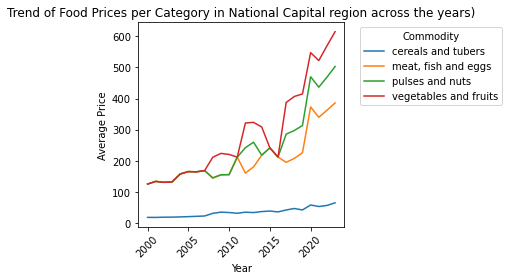

In [11]:
# Filter data for the specific region and category
filtered_data = df_new[(df_new['Region'] == 'National Capital region')]

# Pivot the data for plotting
pivot_data = filtered_data.pivot_table(index=filtered_data['date'].dt.year, columns='category', values='price', aggfunc='mean')

# Create a stacked line chart
plt.figure(figsize=(20, 10))
pivot_data.plot(kind='line', stacked=True)
plt.title(f'Trend of Food Prices per Category in National Capital region across the years)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Average Price of Food Category per Region

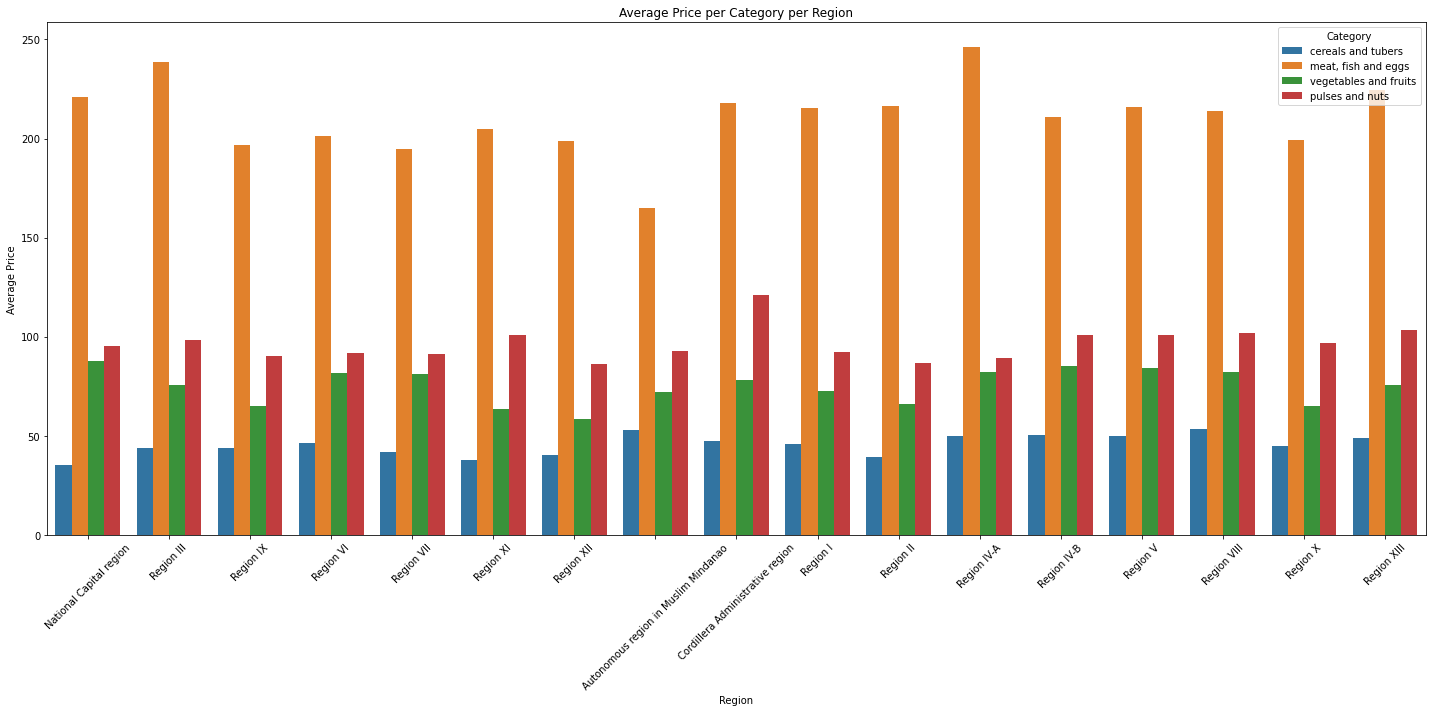

In [12]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_new, x='Region', y='price', hue='category', ci=None)
plt.xticks(rotation=45)
plt.title('Average Price per Category per Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Average Price of Food Category per City (in a specific region)

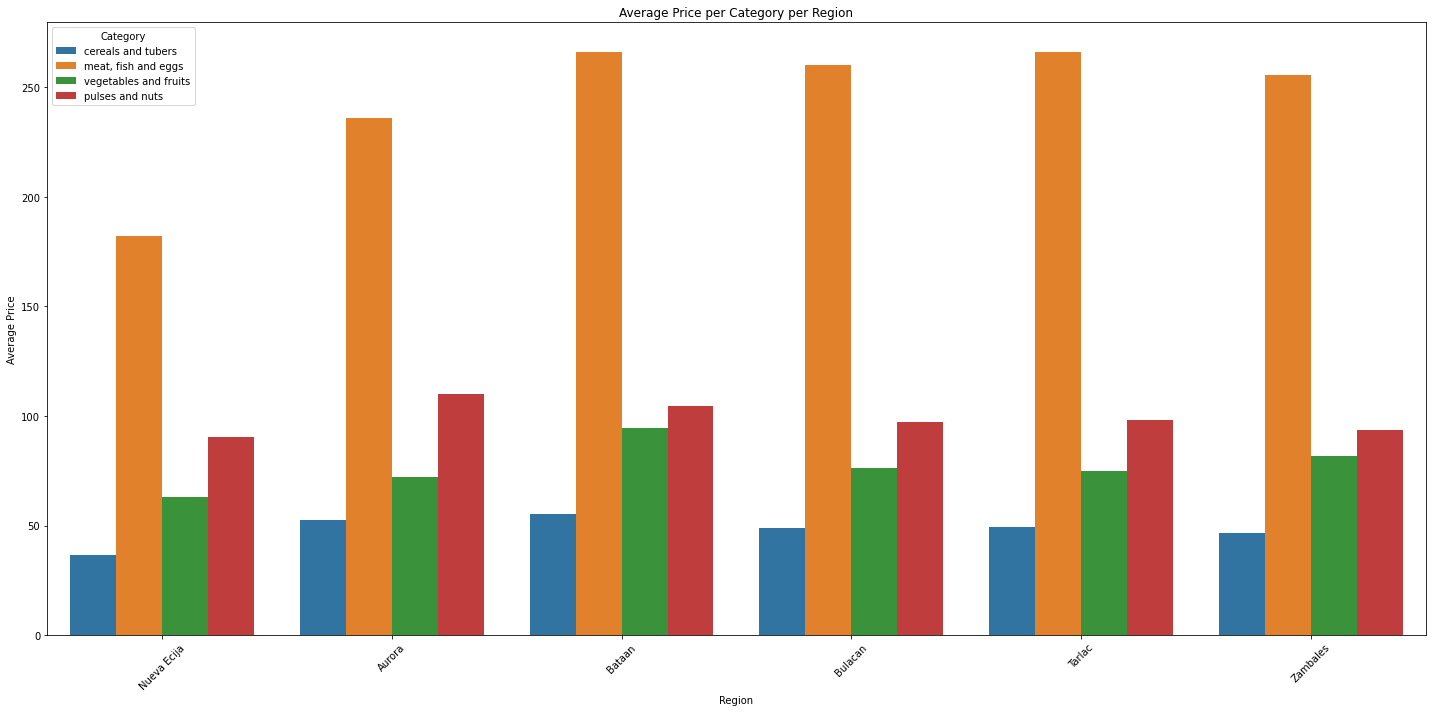

In [13]:
region_data = df_new[df_new['Region'] == 'Region III']

plt.figure(figsize=(20, 10))
sns.barplot(data=region_data, x='City', y='price', hue='category', ci=None)
plt.xticks(rotation=45)
plt.title('Average Price per Category per Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Price of Pork in Region XII Forecast

In [14]:
df_year = df_new[(df_new['date'].dt.year == 2021) & (df_new['commodity'] == 'Meat (pork)') & (df_new['Region'] == 'Region XIII') & (df_new['City'] == 'Agusan del Norte')]
df_year

,date,Region,City,latitude,longitude,category,commodity,unit,priceflag,pricetype,price
66181,2021-01-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,245.00
68756,2021-02-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,318.75
71355,2021-03-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,303.75
73954,2021-04-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,311.25
76553,2021-05-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,302.50
79152,2021-06-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,303.75
81751,2021-07-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,292.50
84346,2021-08-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,286.25
86945,2021-09-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,286.67
89544,2021-10-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,282.50


In [15]:
price_forecast_df = df_year.sort_values('date')
price_forecast_df.set_index('date', inplace=True)
 

price_forecast_df

,Region,City,latitude,longitude,category,commodity,unit,priceflag,pricetype,price
date,,,,,,,,,,
2021-01-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,245.00
2021-02-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,318.75
2021-03-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,303.75
2021-04-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,311.25
2021-05-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,302.50
2021-06-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,303.75
2021-07-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,292.50
2021-08-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,286.25
2021-09-15,Region XIII,Agusan del Norte,9.116421,125.547306,"meat, fish and eggs",Meat (pork),KG,actual,Retail,286.67


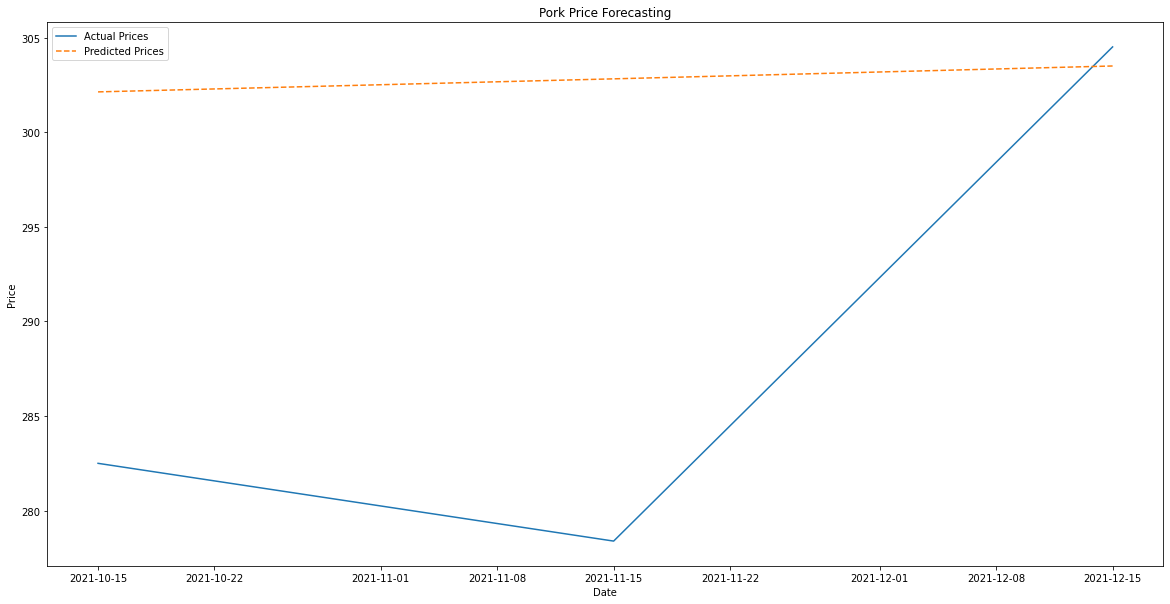

In [16]:
price_forecast_df['lag_price'] = price_forecast_df['price'].shift(1)
price_forecast_df.dropna(inplace=True)

# Split data
X = price_forecast_df[['lag_price']]  # Features
y = price_forecast_df['price']        # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(20, 10))
plt.plot(price_forecast_df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(price_forecast_df.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Pork Price Forecasting')
plt.legend()
plt.show()

In [17]:
df_date = df_new 

df_date['date'] = pd.to_datetime(df_date['date'])
df_date = df_date.set_index('date')

df_date

C:\Users\URIELG~1\AppData\Local\Temp/ipykernel_11944/4040563295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date'] = pd.to_datetime(df_date['date'])


,Region,City,latitude,longitude,category,commodity,unit,priceflag,pricetype,price
date,,,,,,,,,,
2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,15.00
2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,20.00
2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,18.00
2000-01-15,National Capital region,Metropolitan Manila,14.604167,120.982222,"meat, fish and eggs",Meat (pork),KG,actual,Retail,105.37
2000-01-15,Region III,Nueva Ecija,15.541500,121.084800,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,19.00
...,...,...,...,...,...,...,...,...,...,...
2023-04-15,Region XIII,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Garlic,KG,actual,Retail,118.75
2023-04-15,Region XIII,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Mangoes (carabao),KG,actual,Retail,117.50
2023-04-15,Region XIII,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Onions (red),KG,actual,Retail,160.00


## Linear Regression of Average Food Price Over Years

In [18]:
## tama ba to?

average_prices = df_new.groupby(df_new['date'].dt.year)['price'].mean()

# Create X and y for linear regression
X = sm.add_constant(average_prices.index)  # Adding a constant intercept term
                  
y = average_prices.values

# Print coefficient values
print("Coefficient:", model.params[1])

# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_prices.index, y, label='Data')
plt.plot(average_prices.index, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression of Average Food Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'params'